In [208]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
def split_month(x):
    return x[0]

def split_type(x):
    return x[1:]

In [4]:
df = pd.read_csv('result.txt', sep = '\t', header = 0)

In [5]:
df['month'] = df['case_type'].map(split_month)
df['type'] = df['case_type'].map(split_type)

In [6]:
df

,pin,product,case_type,xc_score,dt,ovd_stage,c_score,timing_score,overdue_amt,pay_amount_t3,pay_amount_t15,pay_amount_t30,c_label_t3,c_label_t15,c_label_t30,overdue_amt_tel,month,type
0,jd_5d6236d287be6,京东白条,6B2+,591,2020-08-21,301-390,457.0,557.0,2204.57,NaN,NaN,NaN,0,0,0,2964.21,6,B2+
1,jd_729d4cd6980c0,京东白条,7B2+,374,2020-08-16,301-390,510.0,557.0,3500.00,NaN,NaN,NaN,0,0,0,4070.09,7,B2+
2,15194992249_p,京东白条,7B1+,311,2020-08-02,M7,554.0,559.0,2376.01,NaN,NaN,NaN,0,0,0,2801.94,7,B1+
3,jd_4136814ed4672,京东白条,7B2+,296,2020-08-10,301-390,469.0,557.0,2407.65,NaN,NaN,NaN,0,0,0,3041.14,7,B2+
4,超级大么么哒,京东白条,7B2+,367,2020-08-11,391+,543.0,556.0,884.96,NaN,NaN,NaN,0,0,0,1215.35,7,B2+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855695,飞飞1235270,京东白条,7B2+,296,2020-08-14,301-390,524.0,557.0,1233.99,NaN,NaN,NaN,0,0,0,1490.08,7,B2+
855696,26026274-155333,京东白条,7B1+,303,2020-08-07,211-300,530.0,555.0,2560.61,NaN,NaN,NaN,0,0,0,2952.63,7,B1+
855697,jd_7ae4d335a1007,京东白条,7B1+,296,2020-08-02,M7,561.0,559.0,1599.47,NaN,NaN,NaN,0,0,0,1852.34,7,B1+
855698,jd_7ccc983ced537,京东白条,8B2+,-1,2020-08-10,391+,462.0,557.0,6079.54,NaN,NaN,NaN,0,0,0,11423.55,8,B2+


## 数据概况 ##

......

## xc_score on c_label KS ##

In [7]:
# 仅保留白条数据
df = df[df['product'] == '京东白条']

In [8]:
def calc_ks_auc(data):
    '''
    功能: 计算KS值，输出对应分割点和累计分布函数曲线图
    输入值:
    data: 二维数组或dataframe，包括模型得分和真实的标签
    pred: 一维数组或series，代表模型得分（一般为预测正类的概率）
    y_label: 一维数组或series，代表真实的标签（{0,1}或{-1,1}）
    输出值:
    'ks': KS值, 'auc_score': auc值
    '''
    fpr,tpr,thresholds = roc_curve(data.iloc[:,0], data.iloc[:,1])
    #print(fpr, tpr, thresholds, sep = '\n')
    ks = max(tpr-fpr)
    auc_score = auc(fpr, tpr)
    #plt.plot(fpr, tpr, color='darkorange', lw=2) ###假正率为横坐标，真正率为纵坐标做曲线
    return ks

In [9]:
type_list = ['B1+','B1+WEAK','B2','B2+','B2+WEAK']

In [10]:
# 去除打分为 -1 的, 去除空值
df_temp = df[df['xc_score'] != -1]
df_temp.dropna(subset = ['xc_score', 'c_score', 'timing_score'], inplace = True)
print('xc_score on c_label_t3 KS: ', calc_ks_auc(df_temp[['c_label_t3', 'xc_score']]))
print('c_score on c_label_t3 KS: ', calc_ks_auc(df_temp[['c_label_t3', 'c_score']]))
print('timing_score on c_label_t3 KS: ', calc_ks_auc(df_temp[['c_label_t3', 'timing_score']]))
print('xc_score on c_label_t15 KS: ', calc_ks_auc(df_temp[['c_label_t15', 'xc_score']]))
print('c_score on c_label_t15 KS: ', calc_ks_auc(df_temp[['c_label_t15', 'c_score']]))
print('timing_score on c_label_t15 KS: ', calc_ks_auc(df_temp[['c_label_t15', 'timing_score']]))
# t30评估，去除非表现期的
df_temp_t30 = df_temp[df_temp['dt'] <= '2020-08-20']
print('xc_score on c_label_t30 KS: ', calc_ks_auc(df_temp_t30[['c_label_t30', 'xc_score']]))
print('c_score on c_label_t30 KS: ', calc_ks_auc(df_temp_t30[['c_label_t30', 'c_score']]))
print('timing_score on c_label_t30 KS: ', calc_ks_auc(df_temp_t30[['c_label_t30', 'timing_score']]))

/opt/conda/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


xc_score on c_label_t3 KS:  0.2281237573995861
c_score on c_label_t3 KS:  0.3477309265998534
timing_score on c_label_t3 KS:  0.18219218718374747
xc_score on c_label_t15 KS:  0.1682102783724292
c_score on c_label_t15 KS:  0.2774539830228115
timing_score on c_label_t15 KS:  0.14666897730334477
xc_score on c_label_t30 KS:  0.14230828396231526
c_score on c_label_t30 KS:  0.26451383166862297
timing_score on c_label_t30 KS:  0.1287605777219406


In [16]:
#分案件类别看KS
for ty in type_list:
    df_temp_type = df_temp[df_temp['type'] == ty]
    print(calc_ks_auc(df_temp_type[['c_label_t15', 'timing_score']]))

0.09884236402504068
0.08913412563667232
0.07258409428955556
0.06333699072738147
0.4409484724122207


In [19]:
#t30
for ty in type_list:
    df_temp_type = df_temp[df_temp['type'] == ty]
    print(calc_ks_auc(df_temp_type[['c_label_t30', 'timing_score']]))

0.09196330663914012
0.036141804788213626
0.0511006505411908
0.08598717835212322
0.11713191023535849


## 分组区分能力 ##

In [20]:
# 分组
bins_timing = [554, 556, 557, 558, 559, 560, 562, 627]
bins_xc = [164, 296, 297, 303, 329, 376, 422, 665]
bins_c = [449, 486, 500, 512, 526, 538, 552, 721]

In [21]:
df_temp['xc_score_qcut'] = pd.cut(df['xc_score'], bins = bins_xc)
df_temp['c_score_qcut'] = pd.cut(df['c_score'], bins = bins_c)
df_temp['timing_score_qcut'] = pd.cut(df['timing_score'], bins = bins_timing)

/opt/conda/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [29]:
df_temp_t30['xc_score_qcut'] = pd.cut(df['xc_score'], bins = bins_xc)
df_temp_t30['c_score_qcut'] = pd.cut(df['c_score'], bins = bins_c)
df_temp_t30['timing_score_qcut'] = pd.cut(df['timing_score'], bins = bins_timing)

/opt/conda/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [22]:
df_temp.groupby('xc_score_qcut').count().to_csv('xc_count.txt', sep = '\t')
df_temp.groupby('xc_score_qcut').sum().to_csv('xc_sum.txt', sep = '\t')
df_temp_t30.groupby('xc_score_qcut').count().to_csv('xc_count_t30.txt', sep = '\t')
df_temp_t30.groupby('xc_score_qcut').sum().to_csv('xc_sum_t30.txt', sep = '\t')

In [33]:
df_temp.groupby('c_score_qcut').count().to_csv('c_count.txt', sep = '\t')
df_temp.groupby('c_score_qcut').sum().to_csv('c_sum.txt', sep = '\t')
df_temp_t30.groupby('c_score_qcut').count().to_csv('c_count_t30.txt', sep = '\t')
df_temp_t30.groupby('c_score_qcut').sum().to_csv('c_sum_t30.txt', sep = '\t')

In [34]:
df_temp.groupby('timing_score_qcut').count().to_csv('timing_count.txt', sep = '\t')
df_temp.groupby('timing_score_qcut').sum().to_csv('timing_sum.txt', sep = '\t')
df_temp_t30.groupby('timing_score_qcut').count().to_csv('timing_count_t30.txt', sep = '\t')
df_temp_t30.groupby('timing_score_qcut').sum().to_csv('timing_sum_t30.txt', sep = '\t')

## 分数交叉

In [45]:
df_temp_cross1 = df_temp[['xc_score_qcut', 'timing_score_qcut', 'overdue_amt_tel']]
df_temp_cross2 = df_temp[['xc_score_qcut', 'timing_score_qcut', 'pay_amount_t15']]

In [46]:
df_temp_cross1.groupby(['xc_score_qcut', 'timing_score_qcut']).sum().unstack()

overdue_amt_tel                                            \
timing_score_qcut      (554, 556]    (556, 557]    (557, 558]    (558, 559]   
xc_score_qcut                                                                 
(164, 296]           1.142107e+08  1.988444e+08  4.403781e+07  6.703152e+07   
(296, 297]           2.820926e+08  2.974236e+08  8.638282e+07  1.087225e+08   
(297, 303]           9.202619e+07  1.088059e+08  2.727972e+07  3.797304e+07   
(303, 329]           8.693125e+07  1.023365e+08  3.183243e+07  4.178581e+07   
(329, 376]           8.677291e+07  1.096998e+08  3.932020e+07  4.875448e+07   
(376, 422]           9.013959e+07  1.114363e+08  4.335726e+07  5.308974e+07   
(422, 665]           8.056267e+07  1.094587e+08  4.393582e+07  5.593331e+07   

                                                           
timing_score_qcut   (559, 560]   (560, 562]    (562, 627]  
xc_score_qcut                                              
(164, 296]         34856473.38  46868794.14  4.728461e+07  
(296, 297]         66708999.32  93821839.89  1.243579e+08  
(297, 303]         13899975.69  25078713.47  4.212601e+07  
(303, 329]         17688641.30  26724645.07  4.517849e+07  
(329, 376]         25066044.74  35462114.81  5.048181e+07  
(376, 422]         27523373.05  38225317.50  5.435710e+07  
(422, 665]         31504354.04  44612579.24  6.442457e+07

In [47]:
df_temp_cross2.groupby(['xc_score_qcut', 'timing_score_qcut']).sum().unstack()

pay_amount_t15                                     \
timing_score_qcut     (554, 556]  (556, 557] (557, 558]  (558, 559]   
xc_score_qcut                                                         
(164, 296]            1324927.40  1825793.98  697233.34  1054405.22   
(296, 297]             649270.70  1224800.81  288098.32   538494.64   
(297, 303]             479171.53   813070.20  239373.31   403590.64   
(303, 329]             431528.35   612652.11  292237.91   403497.26   
(329, 376]             532511.09   997344.46  370635.93   571213.88   
(376, 422]             689711.97   812456.12  234494.82   340337.31   
(422, 665]            1158671.15  1621695.77  628016.32   812941.58   

                                                     
timing_score_qcut (559, 560] (560, 562]  (562, 627]  
xc_score_qcut                                        
(164, 296]         568746.98  760329.55  1077139.98  
(296, 297]         480047.96  408111.32   748252.78  
(297, 303]         115419.73  350854.87   564519.26  
(303, 329]         171596.63  251297.48   494899.70  
(329, 376]         154754.11  496854.29   501715.74  
(376, 422]         221014.72  359133.46   720635.78  
(422, 665]         509420.15  826420.71  1354431.27

In [50]:
df_temp_cross1_t30 = df_temp_t30[['xc_score_qcut', 'timing_score_qcut', 'overdue_amt_tel']]
df_temp_cross2_t30 = df_temp_t30[['xc_score_qcut', 'timing_score_qcut', 'pay_amount_t30']]

In [52]:
df_temp_cross1_t30.groupby(['xc_score_qcut', 'timing_score_qcut']).sum().unstack()

overdue_amt_tel                                          \
timing_score_qcut      (554, 556]    (556, 557]   (557, 558]   (558, 559]   
xc_score_qcut                                                               
(164, 296]           6.958848e+07  1.228233e+08  26451485.24  41415251.62   
(296, 297]           1.744854e+08  1.852156e+08  52037703.59  63943427.55   
(297, 303]           5.350307e+07  5.887869e+07  14596015.79  20309262.10   
(303, 329]           5.165213e+07  5.658882e+07  18827069.82  24325617.42   
(329, 376]           5.105992e+07  6.416042e+07  23545239.69  29384238.30   
(376, 422]           5.029497e+07  5.923174e+07  22492105.57  28930829.49   
(422, 665]           4.517728e+07  6.083460e+07  24077375.97  30247412.96   

                                                          
timing_score_qcut   (559, 560]   (560, 562]   (562, 627]  
xc_score_qcut                                             
(164, 296]         26210303.09  32387731.97  36338738.57  
(296, 297]         47494501.02  63548788.76  91959297.69  
(297, 303]          8521946.72  14293293.79  30385159.47  
(303, 329]         11084087.67  16360749.35  34362785.09  
(329, 376]         15707980.60  22356541.24  36972834.15  
(376, 422]         15166742.47  21466196.79  37998084.61  
(422, 665]         18397128.40  26466976.13  42578581.51

In [53]:
df_temp_cross2_t30.groupby(['xc_score_qcut', 'timing_score_qcut']).sum().unstack()

pay_amount_t30                                     \
timing_score_qcut     (554, 556]  (556, 557] (557, 558]  (558, 559]   
xc_score_qcut                                                         
(164, 296]            1574965.19  2485737.50  807011.58  1431049.72   
(296, 297]             666263.38  1619394.26  429442.78   565193.38   
(297, 303]             795527.76   855558.20  221260.14   426616.46   
(303, 329]             553831.78   894259.71  438642.82   564050.13   
(329, 376]             588444.77  1297242.02  508664.20   612215.06   
(376, 422]             834758.37   898441.08  268892.28   367328.46   
(422, 665]            1241148.38  1807403.28  578179.71   875639.43   

                                                      
timing_score_qcut (559, 560]  (560, 562]  (562, 627]  
xc_score_qcut                                         
(164, 296]         755724.50  1058123.80  1423511.58  
(296, 297]         759422.58   685151.06  1014195.66  
(297, 303]         180074.39   407002.40   606168.81  
(303, 329]         231495.66   265030.93   580569.02  
(329, 376]         202056.34   562451.01   604485.33  
(376, 422]         264636.28   398478.44   876411.20  
(422, 665]         584769.67   898803.74  1556860.65

## 分数融合t3

In [216]:
x, y = df_temp[['xc_score', 'c_score', 'timing_score']], df_temp['c_label_t3']

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, stratify = y, random_state = 0)

In [218]:
import lightgbm as lgb

dtrain = lgb.Dataset(X_train, y_train)
dval = lgb.Dataset(X_val, y_val)

params = {
    'metric':'auc',
    'learning_rate':0.05,
    'objective':'binary',
    'max_depth':3,
    'early_stopping_round': 10
}

clf = lgb.train(params, dtrain, num_boost_round = 10, valid_sets = dval, verbose_eval = 10)

/notebook/.home/.local/lib/python3.6/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Number of positive: 4396, number of negative: 611793
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 616189, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007134 -> initscore=-4.935699
[LightGBM] [Info] Start training from score -4.935699
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.779668
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.779668


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

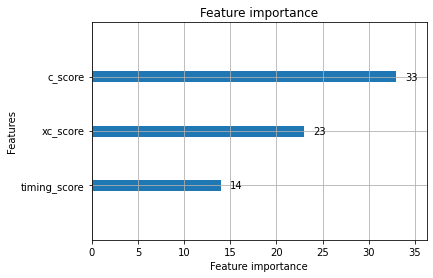

In [219]:
lgb.plot_importance(clf, max_num_features = 20)

In [220]:
preds_lgb_test = clf.predict(X_val)
fpr,tpr,thresholds = roc_curve(y_val, preds_lgb_test)
ks = max(tpr-fpr)
ks

0.4419078292777644

In [221]:
preds_lgb_train = clf.predict(X_train)
fpr,tpr,thresholds = roc_curve(y_train, preds_lgb_train)
a = auc(fpr, tpr)
a

0.7793825221653002

## 分数融合t15

In [222]:
x, y = df_temp[['xc_score', 'c_score', 'timing_score']], df_temp['c_label_t15']

In [223]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, stratify = y, random_state = 0)

In [224]:
import lightgbm as lgb

dtrain = lgb.Dataset(X_train, y_train)
dval = lgb.Dataset(X_val, y_val)

params = {
    'metric':'auc',
    'learning_rate':0.05,
    'objective':'binary',
    'max_depth':3,
    'early_stopping_round': 10
}

clf = lgb.train(params, dtrain, num_boost_round = 10, valid_sets = dval, verbose_eval = 10)

/notebook/.home/.local/lib/python3.6/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Number of positive: 18695, number of negative: 597494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 616189, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030340 -> initscore=-3.464488
[LightGBM] [Info] Start training from score -3.464488
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.722386
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.722386


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

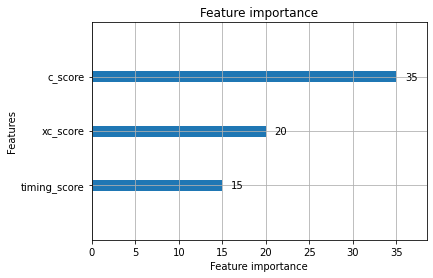

In [225]:
lgb.plot_importance(clf, max_num_features = 20)

In [226]:
preds_lgb_test = clf.predict(X_val)
fpr,tpr,thresholds = roc_curve(y_val, preds_lgb_test)
ks = max(tpr-fpr)
ks

0.33144649208906746

In [228]:
preds_lgb_train = clf.predict(X_train)
fpr,tpr,thresholds = roc_curve(y_train, preds_lgb_train)
a = auc(fpr, tpr)
a

0.7229007421514264

## 分数融合t30

In [229]:
x, y = df_temp_t30[['xc_score', 'c_score', 'timing_score']], df_temp_t30['c_label_t30']

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, stratify = y, random_state = 0)

In [231]:
import lightgbm as lgb

dtrain = lgb.Dataset(X_train, y_train)
dval = lgb.Dataset(X_val, y_val)

params = {
    'metric':'auc',
    'learning_rate':0.05,
    'objective':'binary',
    'max_depth':3,
    'early_stopping_round': 10
}

clf = lgb.train(params, dtrain, num_boost_round = 10, valid_sets = dval, verbose_eval = 10)

/notebook/.home/.local/lib/python3.6/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Number of positive: 20227, number of negative: 356798
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.212062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 377025, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.053649 -> initscore=-2.870151
[LightGBM] [Info] Start training from score -2.870151
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.712326
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.712326


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

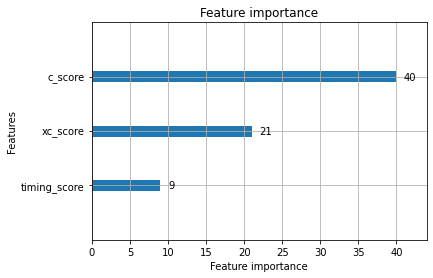

In [232]:
lgb.plot_importance(clf, max_num_features = 20)

In [233]:
preds_lgb_test = clf.predict(X_val)
fpr,tpr,thresholds = roc_curve(y_val, preds_lgb_test)
ks = max(tpr-fpr)
ks

0.3110845195935333

In [234]:
preds_lgb_train = clf.predict(X_train)
fpr,tpr,thresholds = roc_curve(y_train, preds_lgb_train)
a = auc(fpr, tpr)
a

0.7137723505043245

## LR实验

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR

sc = StandardScaler()
sc.fit(X_train)  # 计算均值和方差
x_train_std = sc.transform(X_train) #利用计算好的方差和均值进行Z分数标准化
x_test_std = sc.transform(X_val)

In [173]:
lr = LR(random_state = 0, max_iter = 100)
lr.fit(x_train_std,y_train)

LogisticRegression(random_state=0)

In [174]:
fpr,tpr,thresholds = roc_curve(y_val, lr.predict(X_val))

In [176]:
lr.coef_

array([[0.30503366, 0.68016129, 0.15120836]])